In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
# Import PLACES data
places_df = pd.read_csv("./Resources/processed_PLACES_COPD.csv")
places_df = places_df.drop(["State_County"], axis=1)
places_df.head()

,State,County,Levels_Smokers,Levels_COPD
0,Iowa,Cass,19.3,8.3
1,Iowa,Monona,18.5,8.3
2,Alaska,Dillingham,31.1,8.9
3,Colorado,Custer,13.8,7.5
4,Alaska,Ketchikan Gateway,19.4,6.6


In [3]:
# Import Coal Mines data
coal_df = pd.read_csv("./Resources/processed_Coal_Mines.csv")
coal_df = coal_df.drop(["State_County"], axis=1)
coal_df.head()

,State,County,Surface_Mines,Underground_Mines
0,Alabama,Walker,22,2.0
1,Alabama,Jefferson,22,5.0
2,Alabama,Jefferson,13,5.0
3,Alabama,Tuscaloosa,13,12.0
4,Alabama,Jefferson,13,14.0


In [4]:
# Import Air Quality data
aqi_df = pd.read_csv("./Resources/processed_Decade_Air_Quality.csv")
aqi_df = aqi_df.drop(["State_County"], axis=1)
aqi_df.head()

,State,County,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,Alabama,Baldwin,523.0,455.0,66.0,2.0,0.0,0.0,0.0
1,Alabama,Clay,226.0,194.0,32.0,0.0,0.0,0.0,0.0
2,Alabama,Colbert,586.0,472.0,114.0,0.0,0.0,0.0,0.0
3,Alabama,DeKalb,724.0,635.0,89.0,0.0,0.0,0.0,0.0
4,Alabama,Elmore,472.0,436.0,36.0,0.0,0.0,0.0,0.0


In [5]:
# Import Census 2019 data
census_df = pd.read_csv("./Resources/processed_census_data.csv")
census_df = census_df.drop(["State_County"], axis=1)
census_df.head()

,Unnamed: 0,State,County,PERC_TOT_MALE_0,PERC_TOT_FEMALE_0,PERC_WA_MALE_0,PERC_WA_FEMALE_0,PERC_BA_MALE_0,PERC_BA_FEMALE_0,PERC_IA_MALE_0,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,0,Alabama,Autauga County,48.492008,51.507992,37.369561,38.892767,9.373714,10.739408,0.216578,...,0.747863,1.282051,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,1,Alabama,Baldwin County,48.490373,51.509627,42.471129,44.969852,4.249353,4.527536,0.404508,...,0.427350,0.899685,0.0,0.000000,0.0,0.022492,0.0,0.0,0.000000,0.0
2,2,Alabama,Barbour County,52.920684,47.079316,25.881066,23.272300,25.565098,22.664668,0.417241,...,0.639659,0.426439,0.0,0.213220,0.0,0.213220,0.0,0.0,0.000000,0.0
3,3,Alabama,Bibb County,53.268733,46.731267,39.144414,37.621684,13.132982,8.136108,0.236671,...,1.028278,0.000000,0.0,0.514139,0.0,0.000000,0.0,0.0,0.000000,0.0
4,4,Alabama,Blount County,49.237367,50.762633,47.137966,48.687442,0.892332,0.798949,0.332031,...,1.818182,0.545455,0.0,0.000000,0.0,0.000000,0.0,0.0,0.090909,0.0


In [6]:
# Merge places and coal dataframes
merged_df = pd.merge(places_df, coal_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines
0,Iowa,Cass,19.3,8.3,NaN,NaN
1,Iowa,Monona,18.5,8.3,NaN,NaN
2,Alaska,Dillingham,31.1,8.9,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN
...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN
3178,West Virginia,Webster,26.8,15.3,NaN,NaN
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN


In [7]:
# Merge in the Air Quality data
merged_df = pd.merge(merged_df, aqi_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,Very_Unhealthy_Days,Hazardous_Days
0,Iowa,Cass,19.3,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iowa,Monona,18.5,8.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,Dillingham,31.1,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN,678.0,571.0,103.0,4.0,0.0,0.0,0.0
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN,722.0,546.0,168.0,8.0,0.0,0.0,0.0
3178,West Virginia,Webster,26.8,15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Merge in the census data
merged_df = pd.merge(merged_df, census_df, on=["State", "County"], how="left")
merged_df

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,Iowa,Cass,19.3,8.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iowa,Monona,18.5,8.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alaska,Dillingham,31.1,8.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Custer,13.8,7.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alaska,Ketchikan Gateway,19.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,Wisconsin,Sauk,16.8,6.5,NaN,NaN,678.0,571.0,103.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3177,Wisconsin,Brown,15.1,5.5,NaN,NaN,722.0,546.0,168.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3178,West Virginia,Webster,26.8,15.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3179,Wisconsin,Winnebago,17.1,5.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# View null values
merged_df.isnull().sum()

State                     0
County                    1
Levels_Smokers            0
Levels_COPD               0
Surface_Mines          3078
                       ... 
PERC_HIAC_FEMALE_18    3181
PERC_HAAC_MALE_18      3181
PERC_HAAC_FEMALE_18    3181
PERC_HNAC_MALE_18      3181
PERC_HNAC_FEMALE_18    3181
Length: 1382, dtype: int64

In [10]:
# View the county with a NaN value
merged_df[merged_df['County'].isnull()]

,State,County,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
33,United States,NaN,15.3,6.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Drop the row containing "United States"
merged_df = merged_df[merged_df.State != "United States"]
merged_df.isnull().sum()

State                     0
County                    0
Levels_Smokers            0
Levels_COPD               0
Surface_Mines          3077
                       ... 
PERC_HIAC_FEMALE_18    3180
PERC_HAAC_MALE_18      3180
PERC_HAAC_FEMALE_18    3180
PERC_HNAC_MALE_18      3180
PERC_HNAC_FEMALE_18    3180
Length: 1382, dtype: int64

In [12]:
# Fill Nulls from states without mines to be 0
merged_df = merged_df.fillna(0)
merged_df.isnull().sum()

State                  0
County                 0
Levels_Smokers         0
Levels_COPD            0
Surface_Mines          0
                      ..
PERC_HIAC_FEMALE_18    0
PERC_HAAC_MALE_18      0
PERC_HAAC_FEMALE_18    0
PERC_HNAC_MALE_18      0
PERC_HNAC_FEMALE_18    0
Length: 1382, dtype: int64

In [13]:
# Drop County name as it might confuse the model
dataset = merged_df.drop(["County"], axis=1)

In [14]:
# dataset['Total_Population']= dataset['Total_Population'].astype(float)

In [15]:
le = LabelEncoder()
df2 = dataset.copy()

In [16]:
# Generate our categorical variable lists
dataset_cat = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
dataset_cat

['State']

In [17]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    df2[textColumn] = le.fit_transform(df2[textColumn])

In [18]:
# Display dataframe
df2

,State,Levels_Smokers,Levels_COPD,Surface_Mines,Underground_Mines,Days_with_AQI,Good_Days,Moderate_Days,Unhealthy_for_Sensitive_Groups_Days,Unhealthy_Days,...,PERC_HWAC_MALE_18,PERC_HWAC_FEMALE_18,PERC_HBAC_MALE_18,PERC_HBAC_FEMALE_18,PERC_HIAC_MALE_18,PERC_HIAC_FEMALE_18,PERC_HAAC_MALE_18,PERC_HAAC_FEMALE_18,PERC_HNAC_MALE_18,PERC_HNAC_FEMALE_18
0,15,19.3,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,18.5,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,31.1,8.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,13.8,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,19.4,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,48,16.8,6.5,0.0,0.0,678.0,571.0,103.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3177,48,15.1,5.5,0.0,0.0,722.0,546.0,168.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3178,47,26.8,15.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3179,48,17.1,5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#X = dataset.drop(['Levels_COPD'], axis = 1).values
#y = dataset['Levels_COPD']

In [20]:
# Create our features
X = df2['Days_with_AQI'].values
y = df2['Levels_COPD'].values

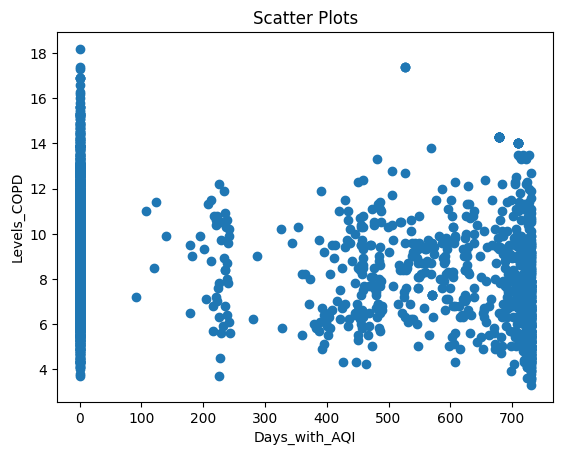

In [21]:
plt.title('Scatter Plots')
plt.xlabel('Days_with_AQI')
plt.ylabel('Levels_COPD')
plt.scatter(X, y)
plt.show()

In [22]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [23]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(dataset[dataset_cat]))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(dataset_cat)

# Set options to show all columns
# pd.options.display.max_columns = 50

# View the dataframe
# encode_df.head()

In [24]:
# Step 4: Training the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/var/folders/qg/6vjkgpvs7z1c7vhvhq3r44dr0000gn/T/ipykernel_55033/1803349395.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [25]:
# Step 5: Predicting the Results
y_pred = regressor.predict(X_test.reshape(-1,1))
y_pred

array([ 9.0756618 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,
        5.816     ,  9.77      ,  9.0756618 , 10.82933333,  9.0756618 ,
        9.0756618 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,
        9.019     ,  9.0756618 ,  9.0756618 ,  9.0756618 ,  7.68      ,
        9.0756618 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,  6.8532013 ,
        9.0756618 ,  9.0756618 ,  6.55764921,  9.0756618 ,  7.34066667,
        7.53578272,  9.21333333,  6.23190476,  7.30666667,  9.0756618 ,
        9.0756618 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,  9.618     ,
        9.0756618 ,  6.55764921,  9.0756618 ,  9.0756618 ,  7.53578272,
        9.14077381,  9.0778658 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,
        9.0756618 ,  9.0756618 ,  6.21133333,  9.0756618 ,  9.0756618 ,
        9.0756618 ,  9.0756618 ,  9.0756618 , 10.1875    ,  7.62984372,
        9.0756618 ,  9.0756618 ,  9.0756618 ,  7.68      ,  7.62984372,
        9.0756618 ,  9.0756618 ,  9.0756618 ,  9.0756618 ,  9.07

In [26]:
# Step 6: Evaluating the Algorithm
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 2.185274669988096


In [27]:
regressor.feature_importances_

array([1.])

In [28]:
importances = regressor.feature_importances_

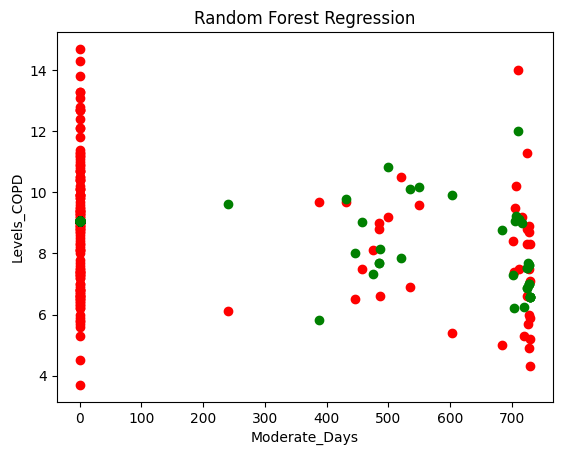

In [29]:
# # Visualising the Random Forest Regression Results  
# 
X_grid = np.arange(int (float(min(X))), int(float(max(X))), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Moderate_Days')
plt.ylabel('Levels_COPD')
plt.show()

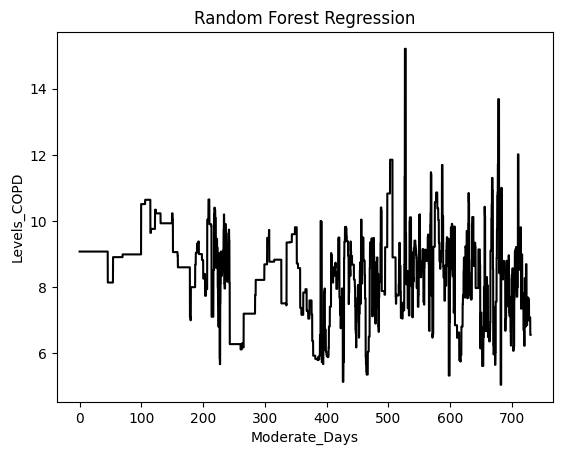

In [30]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Moderate_Days')
plt.ylabel('Levels_COPD')
plt.show()